In [1]:
import heartpy as hp
import matplotlib.pyplot as plt

sample_rate = 250

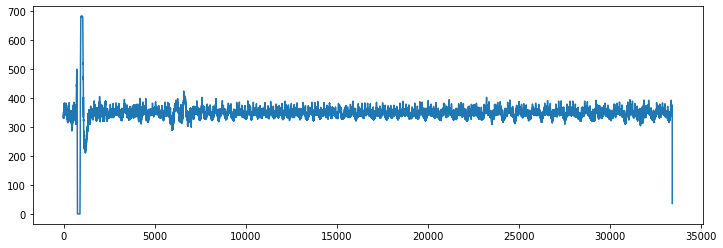

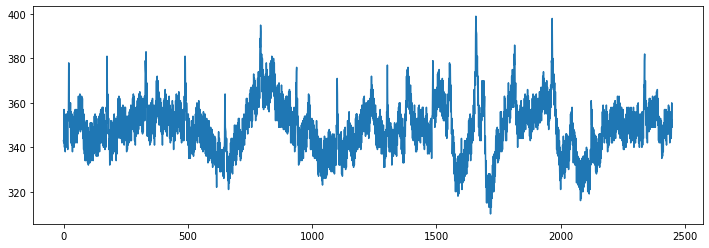

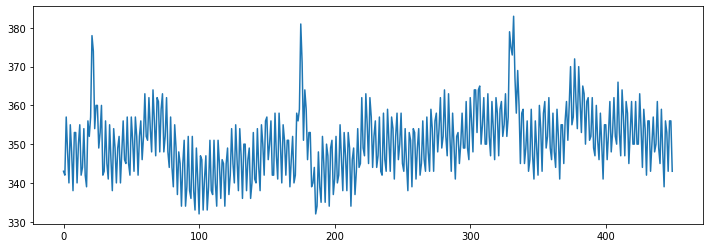

In [2]:
data = hp.get_data('ecg_20-08-kamila.txt')

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[2550:5000])
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[2550:3000])
plt.show()

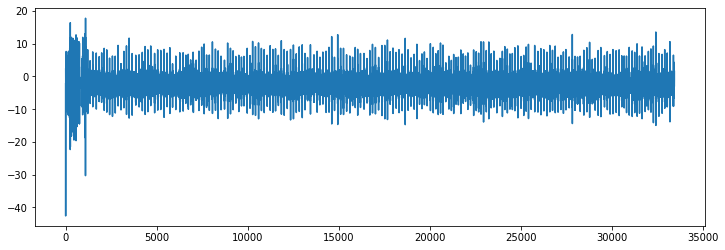

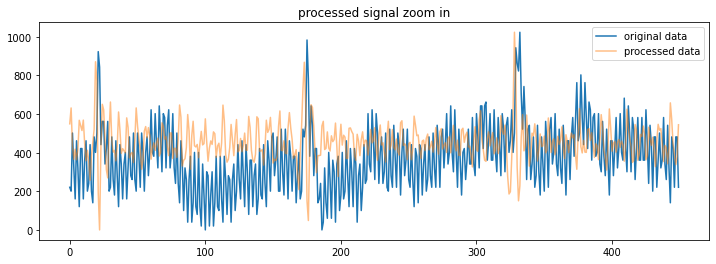

In [8]:
filtered = hp.enhance_ecg_peaks(hp.scale_data(data), sample_rate, 
                                aggregation='median', iterations=5)

#show filtered signal
plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

#zoom in on signal section and overlay filtered segment 
plt.figure(figsize=(12,4))
plt.title('original signal zoom in')
plt.plot(hp.scale_data(data[2550:3000]), label='original data')
plt.title('processed signal zoom in')
plt.plot(hp.scale_data(filtered[2550:3000]), alpha=0.5, label='processed data')
plt.legend()
plt.show()

bpm: 104.958788
ibi: 571.652941
sdnn: 113.807565
sdsd: 57.383618
rmssd: 77.083354
pnn20: 0.712766
pnn50: 0.372340
hr_mad: 48.000000
sd1: 52.923873
sd2: 93.945613
s: 15619.890784
sd1/sd2: 0.563346
breathingrate: 0.000000
sd1: 52.923873
sd2: 93.945613
s: 15619.890784
sd1/sd2: 0.563346


/Users/rogeriotieppo/opt/anaconda3/lib/python3.8/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/rogeriotieppo/opt/anaconda3/lib/python3.8/site-packages/heartpy/visualizeutils.py:299: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

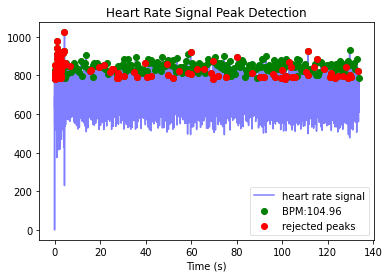

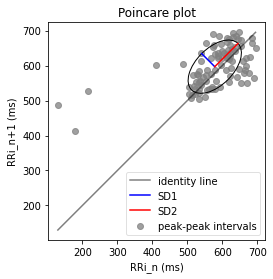

In [10]:
from scipy.signal import resample

resampled_signal = resample(filtered, len(filtered) * 10)

wd, m = hp.process(hp.scale_data(resampled_signal), sample_rate * 10)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))
        
#plot poincare
hp.plot_poincare(wd, m)

poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))